# Welcome to Computer Vision! #

---
이 글은 kaggle의 Computer Vision 강의를 번역한 것입니다.

(오역 및 잘못된 부분이 많으니 참고 바랍니다.)

---


<!-- <center> -->
<!-- <\!-- <img src="./images/1-header.png" width="1600" alt="Header illustration: a line of cars."> -\-> -->
<!-- <img src="" width="1600" alt="Header illustration"> -->
<!-- </center> -->

이 강의에서 배울 것들:
- 최신 딥러닝 구조를 이용하여 **Image Classifier** 구축하기 with Keras
- Reusable block을 사용하여 자신만의 **Custom Convnet** 만들기
- 시각적(Visual) **Feature Extraction**의 기본적인 아이디어 배우기
- **Transfer Learning** 기술 마스터로 모델 성능 향상하기
- **Data Augmentatin** 활용하여 Dataset 보강하기

시각적 **Feature Extraction**에 대한 기본 아이디어를 배웁니다.

(딥러닝 소개 강좌를 이수했다면, 당신은 이미 필요한 모든 것을 알고 있습니다.)

이제 사직합니다!

# Introduction #

이 과정은 Computer Vision의 기본 개념을 소개합니다. 우리의 목표는 인간의 시각 시스템이 해결할 수있는 것과 동일한 종류의 문제를 해결할 수 있을만큼 신경망이 자연 이미지를 "이해"할 수있는 방법을 배우는 것입니다.

이 작업에 가장 적합한 신경망을 **Convolutional Neural Networks**이라고합니다 (**Convnet** 또는 **CNN**이라고합니다. 한국어로는 **합성곱** 신경망이라고 하기도 합니다.) Convolution은 convnet 레이어에 고유한 구조(unique structure)를 제공하는 수학적 연산입니다. 이후 수업에서는 이 구조가 Computer Vision 문제를 해결하는 데 왜  효과적인지 배우게 될 것입니다.

이러한 아이디어를 **이미지 분류(Image Classification)** 문제에 적용 할 것입니다. 사진을 보여줬을 때, 컴퓨터가 사진이 무엇인지 알려주도록 훈련시킬 수 있습니까? 사진에서 식물의 종을 식별 할 수있는 [앱](http://https://identify.plantnet.org/)을 보셨을 것입니다. 그것은 이미지 분류기(Image Classifier)입니다! 이 과정에서는 전문 애플리케이션에서 사용되는 것처럼 강력한 이미지 분류기를 구축하는 방법을 배웁니다.

우리는 이미지 분류에 초점을 맞추고 있지만, 이 과정에서 배우게 될 내용은 모든 종류의 Computer Vision 문제와 관련이 있습니다. 이 과정을 이수하면. [GAN(Generative Adversarial Networks)](https://www.kaggle.com/tags/gan) 및 [Image Segmentation](http://www.kaggle.com/tags/object-segmentation)과 같은 고급 애플리케이션으로 이동할 준비가 된 것입니다.

# The Convolutional Classifier #

이미지 분류에서 사용되는 Convnet은 두 개의 부분으로 구성됩니다.
- **Convolutional**
- **Dense head**

<center>
<!-- <img src="./images/1-parts-of-a-convnet.png" width="600" alt="The parts of a convnet: image, base, head, class; input, extract, classify, output.">-->
<img src="https://i.imgur.com/U0n5xjU.png" width="600" alt="The parts of a convnet: image, base, head, class; input, extract, classify, output.">
</center>


Base는 이미지에서 Feature를 추출(**Extract the features**)하는데 사용됩니다.
주로 convolution 연산을 수행하는 레이어로 구성되지만 다른 종류의 레이어도 포함하는 경우가 많습니다.
(다음 강의에서 이에 대해 배울 것입니다.)

Head는 이미지가 어떤 종류인지 결정(**Determine the class**)하는데 사용됩니다. 
주로 dense 레이어로 구성되지만 Dropout과 같은 다른 레이어를 포함 할 수 있습니다.

시각적 특징이란 무엇을 의미합니까? 특징은 선, 색상, 질감, 모양, 패턴 -- 또는 복잡한 조합 일 수 있습니다.

전체 과정은 다음과 같습니다:


<center>
<!-- <img src="./images/1-extract-classify.png" width="600" alt="The idea of feature extraction."> -->
<img src="https://i.imgur.com/UUAafkn.png" width="600" alt="The idea of feature extraction.">
</center>

추출된 Feature는 실제로 약간 다르게 보이지만, 이것은 아이디어(idea)를 제공합니다.

# 분류기 학습(Training the Classifier) #

훈련 과정(Training)에서 신경망의 목적은 두가지를 배우는 것입니다.
1. 이미지에서 어떤 Feature를 추출할 것인가 (base).
2. Class(개, 고양이 등)가 어떤 Feature와 어울리는가 (head).

요즘 CNN은 거의 밑바닥부터(from scratch) 학습하지 않습니다. 대부분 우리는 **사전 훈련된 모델(pretrained model)의 base를 재활용**합니다.
사전 훈련된 base에 **학습되지 않은 head**를 붙입니다. 즉, 이미 *1. Feature 추출(Extract Features)*을 학습한 네트워크의 일부분을 재사용하고, 여기에 새로운 레이어를 붙여 *2. 분류하기(Classify)*를 학습합니다.


<center>
<!-- <img src="./images/1-attach-head-to-base.png" width="400" alt="Attaching a new head to a trained base."> -->
<img src="https://imgur.com/E49fsmV.png" width="400" alt="Attaching a new head to a trained base.">
</center>

Head는 일반적으로 몇 개의 dense 레이어로만 구성되기 때문에, 비교적 적은 데이터로 매우 정확한 분류기를 만들 수 있습니다.


사전 훈련된 모델을 재사용하는 것은 **전이 학습(Transfer Learning)**으로 알려진 기술입니다. 오늘날 거의 모든 이미지 분류기가 이 기술을 사용할 정도로 매우 효과적입니다.

# 예제 - Train a Convnet Classifier #

이 과정에서 우리는 다음 문제를 해결하기위한 분류기를 만들 것입니다. 
- Q. 이 사진이 *차(Car)* 또는 *트럭(Truck)*입니까? 

우리의 데이터 세트는 약 10,000장의 다양한 차량이 있는데 절반은 자동차, 절반은 트럭으로 구성되어 있습니다.

## Step 1 - Load Data ##

다음 숨겨진 셀은 일부 라이브러리를 가져오고 데이터 파이프 라인을 설정합니다. `ds_train`이라는 학습 분할과 `ds_valid`라는 유효성 검사 분할(validation split)이 있습니다.

In [1]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    '../input/car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '../input/car-or-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


훈련 세트의 몇 가지 예를 살펴 보겠습니다.

In [2]:
import matplotlib.pyplot as plt

## Step 2 - Define Pretrained Base ##

사전 훈련에 가장 일반적으로 사용되는 데이터 세트는 다양한 종류의 자연 이미지로 구성된 대규모 데이터 세트인 [*ImageNet*](http://image-net.org/about-overview)입니다. Keras는 ImageNet에 대한 다양한 사전 훈련된 모델들을 [`applications` module](https://www.tensorflow.org/api_docs/python/tf/keras/applications)에서 포함하고 있습니다. 우리가 사용할 사전 훈련 된 모델은 **VGG16**입니다.

In [3]:
pretrained_base = tf.keras.models.load_model(
    '../input/cv-course-models/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

## Step 3 - Attach Head ##

다음으로 분류기 Head(Classifier Head)를 부착합니다. 이 예에서는 hidden unit 레이어(첫 번째 `Dense`레이어)를 사용하여 출력을 Class 1 `트럭`에 대한 확률 점수로 변환합니다. `Flatten`레이어는 base의 2차원 출력(two dimensional outputs)을 Head에 필요한 1차원 입력(one dimensional inputs)으로 변환합니다.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

## Step 4 - Train ##

마지막으로 모델을 훈련시켜 보겠습니다. 이것은 2가지 class를 분류하는 문제기 때문에`crossentropy`와`accuracy`의 바이너리 버전을 사용할 것입니다. `Adam` 옵티마이저(Optimizer)는 일반적으로 잘 작동하므로 우리도 선택해 사용합니다.

In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=3,
)

Epoch 1/3
80/80 [==============================] - 26s 330ms/step - loss: 0.4754 - binary_accuracy: 0.7723 - val_loss: 0.3734 - val_binary_accuracy: 0.8390
Epoch 2/3
80/80 [==============================] - 16s 200ms/step - loss: 0.3473 - binary_accuracy: 0.8525 - val_loss: 0.3397 - val_binary_accuracy: 0.8559
Epoch 3/3
80/80 [==============================] - 16s 198ms/step - loss: 0.2982 - binary_accuracy: 0.8800 - val_loss: 0.3264 - val_binary_accuracy: 0.8628


신경망을 훈련할 때 항상 손실(loss) 및 메트릭(metric) plot을 살펴보는 것이 좋습니다. `history` 객체는`history.history` 사전(Dictionary) 구조에 이 정보를 가지고 있습니다. Pandas를 사용하여이 사전을 데이터 프레임으로 변환하고 내장 함수로 시각화(plot)할 수 있습니다.

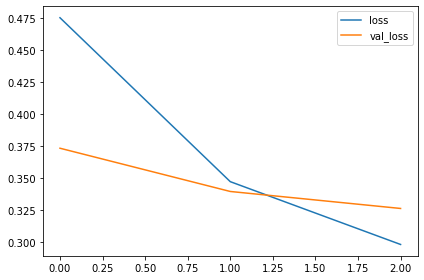

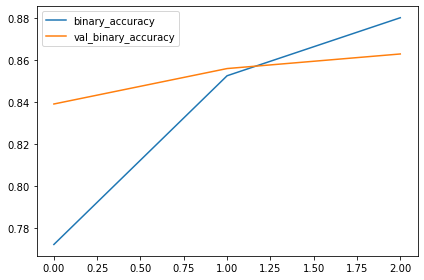

In [6]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# Conclusion #

이 강의에서 우리는 CNN 분류기(Classifier) 구조를 배웠습니다.
- 네트워크에서 분류기 역할을 하는 `head`
- Feature 추출(Feature Extraction)을 수행하는 `base`

Head는 기본적으로 딥러닝 입문 과정에서 배운 것과 같은 일반적인 분류기입니다. Feature의 경우 base에 의해 추출된 특징(features)들을 사용합니다. 이것이 Convolution 분류기의 기본 아이디어입니다.

: Feature Engineering을 수행하는 하나의 unit을 분류기 자체에 연결할 수 있다는 것입니다.


위 내용은 깊은 신경망 모델이 기존 머신러닝 모델과 비교하여 가지는 큰 장점 중 하나입니다. 올바른 네트워크 구조가 주어지면 깊은 신경망(DNN)은 문제를 해결하는 데 필요한 기능(features)을 엔지니어링하는 방법을 배울 수 있습니다.

다음 몇 가지 강의에서는 Convolution base가 Feature Extraction을 수행하는 방법을 살펴 보겠습니다. 그다음 이러한 아이디어를 적용하고 자신만의 분류기를 설계하는 방법을 배우게 됩니다.

# Your Turn #

이제, [**실전 문제(Exercise)**](https://www.kaggle.com/kernels/fork/10781907)로 이동해서 자신만의 이미지 분류기(Image Classifier)를 만들어보세요!

---

*질문이나 코멘트가 있다면, 저에게 문의 주시거나 댓글을 남겨주세요. 혹은 한국 [Vision & AI Study(VAIS) 그룹](https://v-ais.github.io)에서 자유롭게 토론해주세요.

*원문에 대해서는 [Learn Discussion forum](https://www.kaggle.com/learn-forum)을 방문하여 다른 학습자들과 토론해주세요.*